**Author:Sejal Tawade**







**The Sparks Foundation - Data Science and Business Analytics**

**Task 6:Prediction using Decision Tree Algorithm**

The purpose of this task is to be able to predict the class(iris species) while creating decision tree classifier and visualizing the given data


**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from IPython.display import Image
import pydotplus


**Loading Dataset**

In [ ]:
df_iris=pd.read_csv("/content/Iris.csv")
df_iris.drop("Id",axis=1,inplace=True)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Preliminary Analysis**

In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df_iris.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

In [ ]:
df_iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df_iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000




**Preparation Data**

In [ ]:
x=df_iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df_iris["Species"]
features=list(df_iris.columns[:4])

In [ ]:
x.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train.shape

(100, 4)

In [ ]:
x_test.shape

(50, 4)

In [ ]:
y_train.shape

(100,)

In [ ]:
y_test.shape

(50,)

**Visualizing**

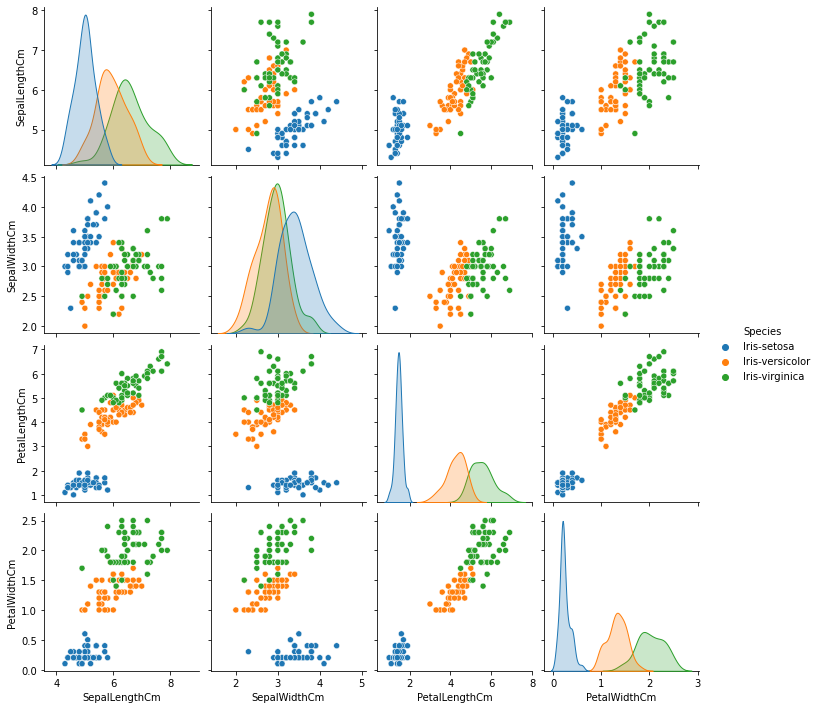

In [ ]:
sns.pairplot(df_iris,hue="Species")
sns.set(rc={'figure.figsize':(10,7)})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


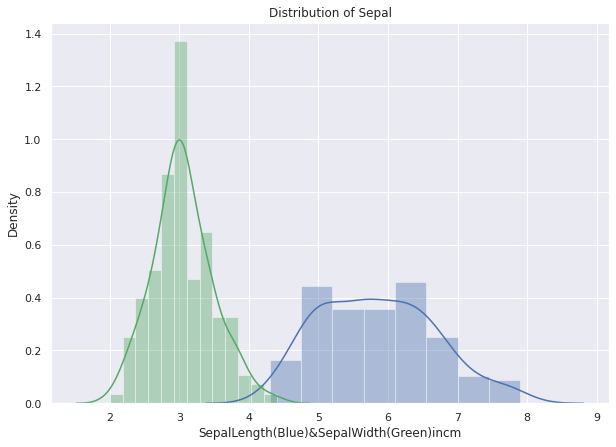

In [ ]:
sns.distplot(x['SepalLengthCm'],color="b")
sns.distplot(x['SepalWidthCm'],color="g")
plt.xlabel("SepalLength(Blue)&SepalWidth(Green)incm")
plt.ylabel("Density")
plt.title("Distribution of Sepal")
sns.set(rc={'figure.figsize':(10,10)})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


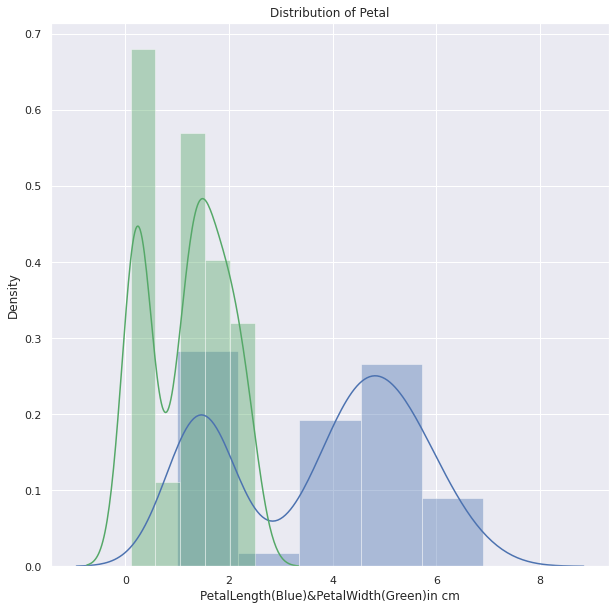

In [ ]:
sns.distplot(x['PetalLengthCm'],color="b")
sns.distplot(x['PetalWidthCm'],color="g")
plt.xlabel("PetalLength(Blue)&PetalWidth(Green)in cm")
plt.ylabel("Density")
plt.title("Distribution of Petal")
sns.set(rc={"figure.figsize":(10,10)})

**Prediction and modelling using Decision Tree**

The Decision tree can be used for classification and regression.The decision tree classifier will be used in this modelling since classification being used to predict descrete label while regression to predict continuous data

In [ ]:
model=DecisionTreeClassifier(criterion="gini",random_state=0)
model.fit(x_train,y_train)
print("Decision tree classifier successfully Built")

Decision tree classifier successfully Built


In [ ]:
print("Accuracy on training set{:.2f}".format(model.score(x_train,y_train)))
print("Accuracy on test set{:.2f}".format(model.score(x_test,y_test)))

Accuracy on training set1.00
Accuracy on test set0.96


**The accuracy of training set is 100% because it's the train the pure sepal and petal.The test set accuracy is quite good for making the prediction**

In [ ]:
y_pred=model.predict(x_test)
print("species prediction")
print(y_pred)

species prediction
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


**Confusion Matrix**

In [ ]:
cm=confusion_matrix(y_test,y_pred,labels=["Iris-setosa","Iris-setosa","Iris-virginica"])
cm

array([[ 0,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 15]])

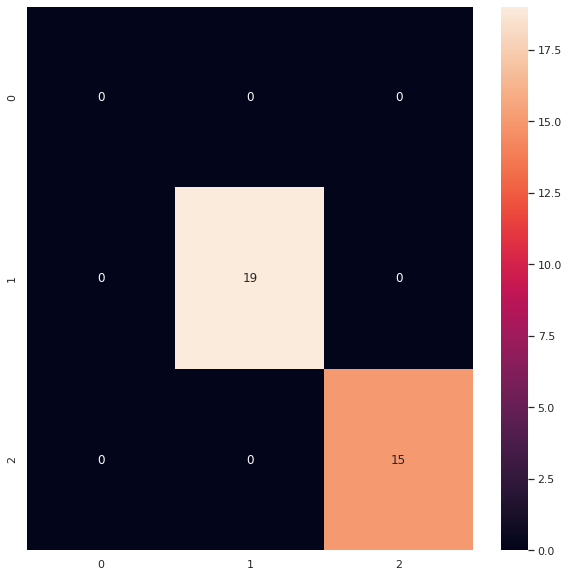

In [ ]:
df_cm=pd.DataFrame(cm)
sns.heatmap(df_cm,annot=True)

From the confusion matrix,it's shown the prediction and test is quite significant for classify the species class



**Visualizing Decision Tree Classifier**

In [ ]:
#create Dot Data
dot_data=tree.export_graphviz(model,out_file=None,feature_names=features,class_names=["Iris-setosa","Iris-setosa","Iris-virginica"])

In [ ]:
#draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

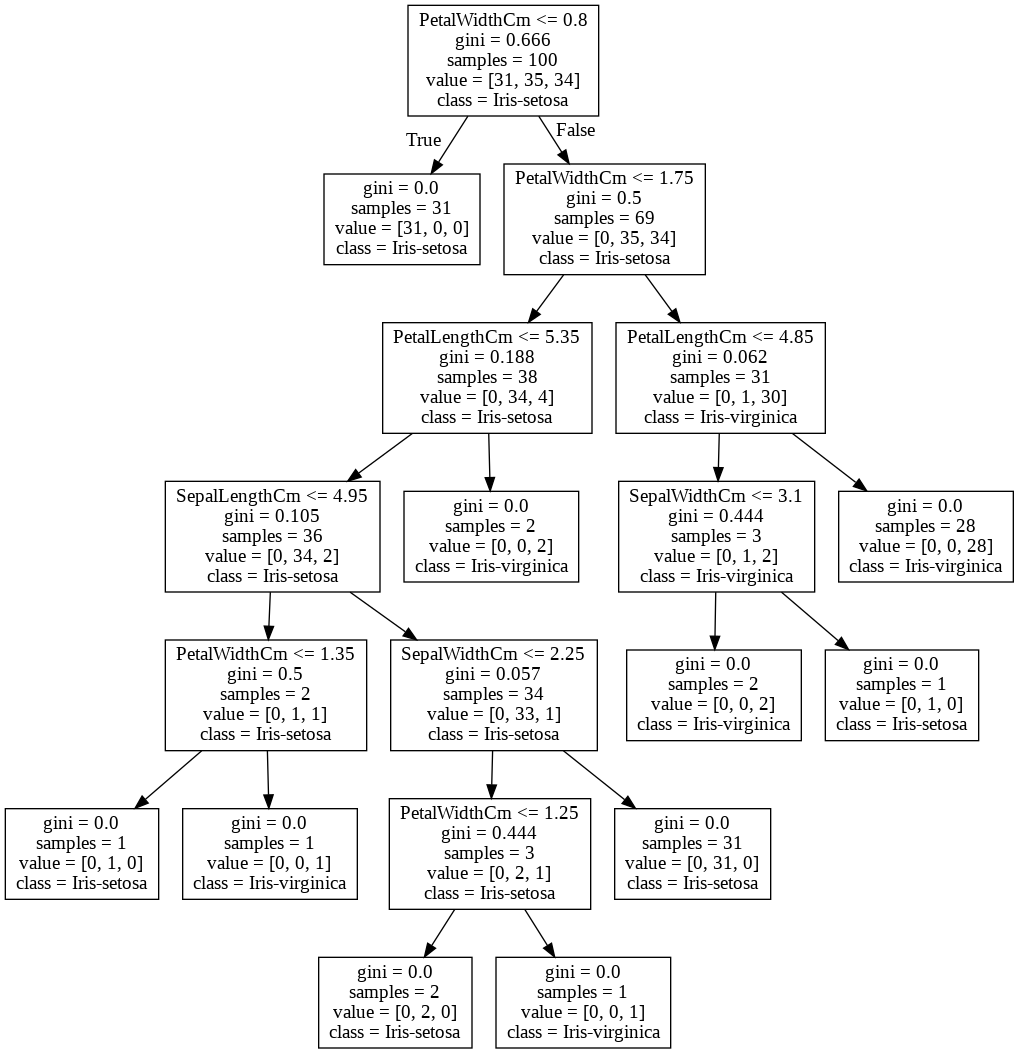

In [ ]:
#show graph
Image(graph.create_png())